In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [4]:
df_cols = df.select_dtypes(include= object)
df_cols

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [5]:
for i in df.columns[[1,2,5,7,12]]:
    print(f'{i} : {df[i].unique()}')
    print('='*80)

person_gender : ['female' 'male']
person_education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file : ['No' 'Yes']


<Axes: >

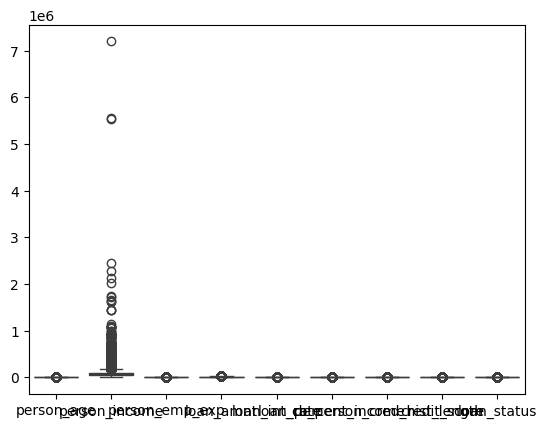

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns   
sns.boxplot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [9]:
x = df.drop('loan_status', axis= 1)
y = df['loan_status']

# Splitting data

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, random_state= 42)

# Ordinal Encoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [13]:
ord = OrdinalEncoder(categories= [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']])
xtrain['person_education'] = ord.fit_transform(xtrain[['person_education']])
xtrain['person_education'].unique()

array([2., 0., 3., 1., 4.])

In [14]:
xtest['person_education'] = ord.transform(xtest[['person_education']])
xtest['person_education'].unique()

array([1., 3., 2., 0., 4.])

In [15]:
xtest

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,32.0,male,1.0,96865.0,10,MORTGAGE,7500.0,EDUCATION,6.04,0.08,10.0,601,No
9911,24.0,male,1.0,56838.0,6,RENT,9000.0,EDUCATION,11.49,0.16,4.0,647,Yes
43386,22.0,female,3.0,37298.0,0,RENT,5000.0,MEDICAL,14.88,0.13,4.0,711,No
13822,23.0,female,2.0,39944.0,1,OWN,5000.0,VENTURE,13.99,0.13,3.0,597,Yes
44810,42.0,male,0.0,67974.0,20,MORTGAGE,10000.0,HOMEIMPROVEMENT,15.41,0.15,11.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,21.0,male,2.0,133205.0,0,MORTGAGE,14000.0,VENTURE,9.99,0.11,2.0,654,No
30384,39.0,male,0.0,61889.0,17,RENT,6725.0,EDUCATION,16.45,0.11,11.0,606,Yes
36665,24.0,female,3.0,78950.0,1,RENT,14000.0,EDUCATION,11.65,0.18,3.0,614,No
30569,38.0,male,1.0,37142.0,16,RENT,8000.0,MEDICAL,11.01,0.22,14.0,695,No


In [16]:
df_cols.columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

# OneHotEncoding

In [17]:
from sklearn.preprocessing import OneHotEncoder
col = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False)
xtrain_encoded = encoder.fit_transform(xtrain[col])
xtest_encoded = encoder.transform(xtest[col])

In [18]:
encoder.get_feature_names_out(col)

array(['person_gender_female', 'person_gender_male',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_No',
       'previous_loan_defaults_on_file_Yes'], dtype=object)

In [19]:
a = encoder.get_feature_names_out(col)
xtrain_encoded = pd.DataFrame(xtrain_encoded, columns= a, index = xtrain.index)
xtest_encoded = pd.DataFrame(xtest_encoded, columns= a, index= xtest.index)

In [20]:
xtrain = xtrain.drop(columns= col, axis = 1)
xtest = xtest.drop(columns= col, axis= 1)

In [21]:
xtrain_final = pd.concat([xtrain, xtrain_encoded], axis= 1)
xtest_final = pd.concat([xtest, xtest_encoded], axis = 1)

In [22]:
xtrain_final.shape

(36000, 23)

<Axes: >

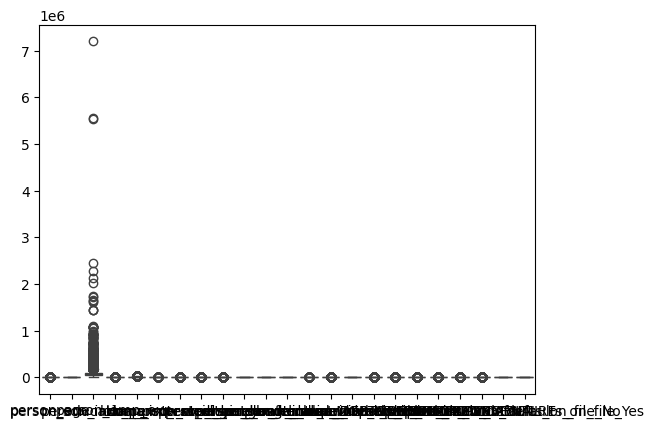

In [23]:
sns.boxplot(xtrain_final)

# Robust scaling due to outliers

In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
xtrain_final = scaler.fit_transform(xtrain_final)
xtest_final = scaler.transform(xtest_final)

# Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain_final, ytrain)

LogisticRegression()

In [26]:
ypred = model.predict(xtrain_final)

In [27]:
ypred_t = model.predict(xtest_final)

In [28]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred)

0.4040211814214395

In [29]:
r2_score(ytest, ypred_t)

0.387611299724553

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

In [31]:
confusion_matrix(ytrain,ypred)

array([[26312,  1698],
       [ 2007,  5983]], dtype=int64)

In [32]:
ytrain.value_counts()

loan_status
0    28010
1     7990
Name: count, dtype: int64

In [33]:
ytest.value_counts()

loan_status
0    6990
1    2010
Name: count, dtype: int64

In [34]:
precision_score(ytrain,ypred,pos_label=0)

0.9291288534199654

In [35]:
precision_score(ytrain,ypred,pos_label=1)


0.7789350345007161

In [36]:
recall_score(ytrain,ypred,pos_label=0)

0.9393787932881114

In [37]:
recall_score(ytrain,ypred,pos_label=1)

0.748811013767209

In [38]:
accuracy_score(ytrain,ypred)

0.8970833333333333

In [39]:
f1_score(ytrain,ypred,pos_label=0)

0.9342257096699746

In [40]:
f1_score(ytrain,ypred,pos_label=1)


0.7635760321613171